<a href="https://colab.research.google.com/github/RubeRad/tcscs/blob/master/Mileages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# raise authentication popup to give access to your google account
# on the last screen, check all the boxes
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [4]:
# Fetch the spreadsheet and dump it to VM as csv
wb = gc.open('I Got Gas')
ws = wb.sheet1
from gspread.utils import ExportFormat
with open('mileage.csv', 'wb') as f:
  f.write( wb.export(format=ExportFormat.CSV) )

In [5]:
df = pd.read_csv('mileage.csv', parse_dates=['DATE'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   NAME        61 non-null     object        
 1   DATE        61 non-null     datetime64[ns]
 2   ODO         61 non-null     float64       
 3   Unnamed: 3  1 non-null      object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 2.0+ KB


In [12]:
slc = df[df.NAME=='Elmo']
slc

,NAME,DATE,ODO,Unnamed: 3
0,Elmo,2013-01-13,138124.0,NaN
1,Elmo,2013-08-01,139673.0,NaN
3,Elmo,2014-01-01,140186.0,NaN
5,Elmo,2014-08-21,140615.0,NaN
6,Elmo,2015-01-01,141047.0,NaN
9,Elmo,2015-05-06,142100.0,NaN
10,Elmo,2015-11-19,143034.0,NaN
11,Elmo,2016-01-01,143179.0,NaN
15,Elmo,2016-10-30,144700.0,NaN
17,Elmo,2017-01-01,144893.0,NaN


In [13]:
de = slc[ ['DATE','ODO'] ].diff()
de

,DATE,ODO
0,NaT,NaN
1,200 days,1549.0
3,153 days,513.0
5,232 days,429.0
6,133 days,432.0
9,125 days,1053.0
10,197 days,934.0
11,43 days,145.0
15,303 days,1521.0
17,63 days,193.0


In [14]:
de.ODO / de.DATE.dt.days * 365

,0
0,NaN
1,2826.925000
3,1223.823529
5,674.935345
6,1185.563910
9,3074.760000
10,1730.507614
11,1230.813953
15,1832.227723
17,1118.174603


In [15]:
colors = {'Elmo': 'r',
          'Homer': 'darkgray',
          'Quetzl': 'gold',
          'Blue Steel': 'darkblue',
          'Blue Steel Reset': 'darkblue',
          'Marie Passat': 'gray',
          'Enok': 'silver',
          'Buns': 'orange',
          'Nancy Wheeler' : 'green'}

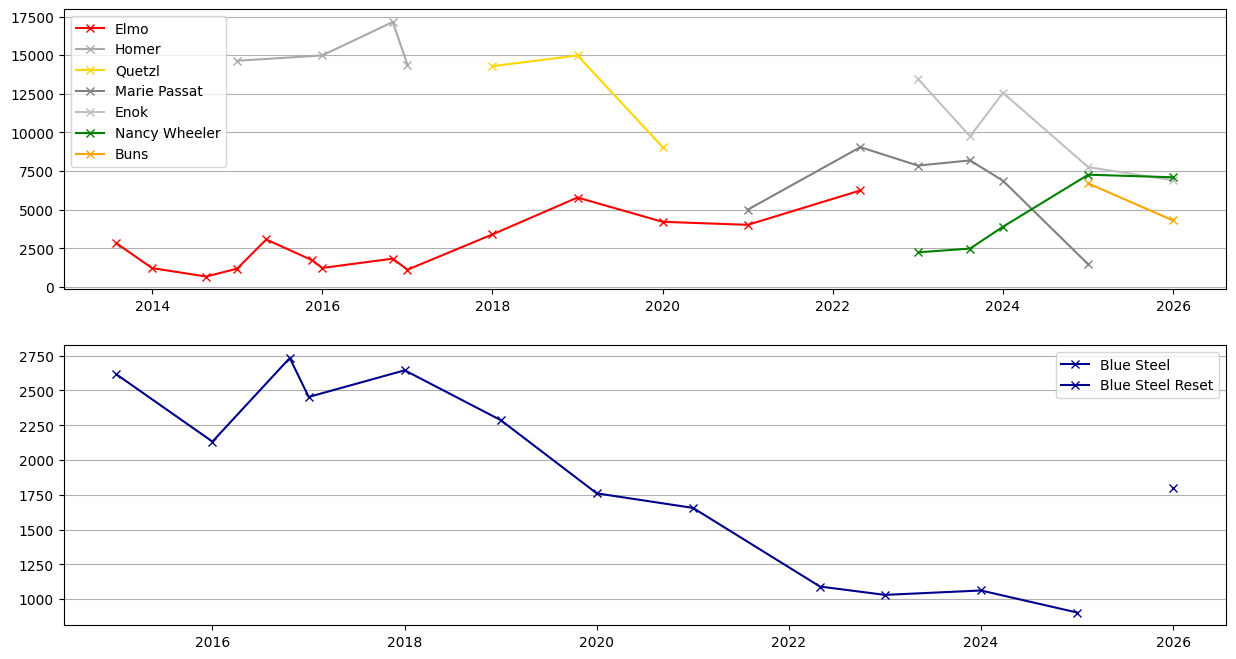

In [16]:
fig = plt.figure(figsize=((15,8)))
cars = fig.add_subplot(2,1,1)
bike = fig.add_subplot(2,1,2)
for veh in df.NAME.unique():
  #print(veh)
  slc = df[df.NAME==veh]
  ddf = slc[['DATE','ODO']].diff()
  mpery = ddf.ODO / ddf.DATE.dt.days * 365
  axx = bike if re.search(r'Blue Steel', veh) else cars
  axx.plot(slc.DATE, mpery, label=veh, color=colors[veh], marker='x')
cars.grid(axis='y')
cars.legend()
bike.grid(axis='y')
bike.legend()